# **1. Data Source and Contents**

import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


import and read the dataset

In [2]:
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')
df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


check for dataset info

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB
None


check for data size

In [4]:
print(df.shape)

(48842, 11)


# **Data cleanning and transformations**

check for missing values

In [5]:
print(df.isnull().sum())

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


check for outliers

In [6]:
print(df.describe())

                  y
count  48842.000000
mean       0.239282
std        0.426649
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


check for duplicates

In [7]:
print(df.duplicated().sum())

40012


In [8]:
df.columns

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'flag', 'y'],
      dtype='object')

# **2. Finding Optimal Value of a key Ensemble Method Hyper-parameter**

import one hot encoding and classifier libraries

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

provide one hot encoding to transform data, note that the flag can be removed after train and test data formed.

In [10]:
train_data = df[df.flag == 'train'].drop(['flag', 'education_num_bin'], axis = 1)
test_data = df[df.flag == 'test'].drop(['flag', 'education_num_bin'], axis = 1)

setting x and y for both train and test datasets

In [11]:
x_train = train_data.drop('y', axis = 1)        
x_test = test_data.drop('y', axis = 1)
y_train = train_data.y  
y_test = test_data.y

get dummies for x_train and x_test

In [12]:
OHE = OneHotEncoder()
x_train = OHE.fit_transform(x_train).toarray()
x_test = OHE.fit_transform(x_test).toarray()

build a decision tree model

In [13]:
dtree = DecisionTreeClassifier(max_depth = 10, 
                               random_state = 101,
                               max_features = None, 
                               min_samples_leaf = 15)
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)

The decsion tree with given parameters can perfectly ran

**“Accuracy” Vs. “Maximum
Depth” for DecisionTreeClassifier algorithm**

Text(0.5, 0, 'Max depth')

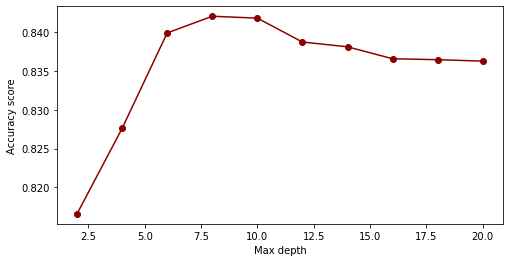

In [14]:
results = []
max_depth_options = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth = trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    #Accuracy function  
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)
plt.figure(figsize = (8, 4))
pd.Series(results, max_depth_options).plot(color = 'darkred', marker = 'o')
plt.ylabel('Accuracy score')
plt.xlabel('Max depth')

**“AUC” Vs. “Maximum
Depth” for DecisionTreeClassifier algorithm**

Text(0.5, 0, 'Max depth')

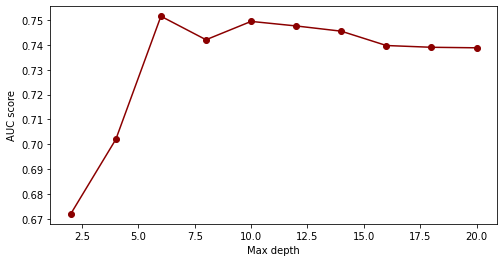

In [15]:
results1 = []
max_depth_options = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth = trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    #AUC function  
    auc = roc_auc_score(y_test, y_pred)
    results1.append(auc)
plt.figure(figsize = (8, 4))
pd.Series(results1, max_depth_options).plot(color = 'darkred', marker = 'o')
plt.ylabel('AUC score')
plt.xlabel('Max depth')

# **3. Building a Random Forest Model**

importing libraries for Random forest andd accuraacy

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Random forest accuraacy model

Text(0.5, 0, 'n_estimators')

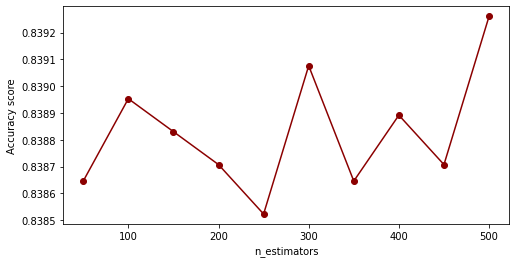

In [37]:
results_acc1 = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for trees in n_estimators:
    model_acc1 = RandomForestClassifier(n_estimators = trees, random_state = 101)
    model_acc1.fit(x_train, y_train)
    y_pred = model_acc1.predict(x_test)
    #Accuracy function  
    accuracy1 = np.mean(y_test == y_pred)
    results_acc1.append(accuracy1)
plt.figure(figsize = (8, 4))
pd.Series(results_acc1, n_estimators).plot(color = 'darkred', marker = 'o')
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')

Random forest AUC model

Text(0.5, 0, 'n_estimators')

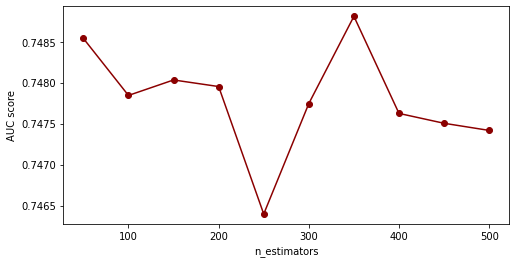

In [38]:
results_auc1 = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for trees in n_estimators:
    model_acc2 = RandomForestClassifier(n_estimators = trees, random_state = 101)
    model_acc2.fit(x_train, y_train)
    y_pred = model_acc2.predict(x_test)
    #AUC function  
    auc1 = roc_auc_score(y_test, y_pred)
    results_auc1.append(auc1)
plt.figure(figsize = (8, 4))
pd.Series(results_auc1, n_estimators).plot(color = 'darkred', marker = 'o')
plt.ylabel('AUC score')
plt.xlabel('n_estimators')

# **4. Building AdaBoost, Gradient Boost, and XGB.**

Import libraries for Ada Boost, Gradient Boost, and XGB

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

Ada Boost accuraacy model

Text(0.5, 0, 'n_estimators')

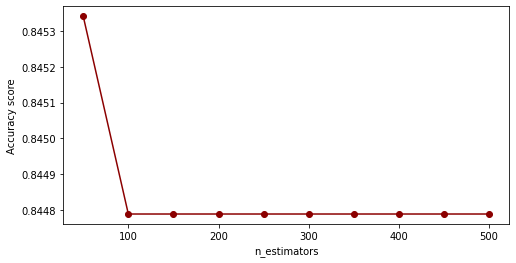

In [41]:
results_acc2 = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for trees in n_estimators:
    model_acc3 = AdaBoostClassifier(n_estimators = trees, random_state = 101)
    model_acc3.fit(x_train, y_train)
    y_pred = model_acc3.predict(x_test)
    #Accuracy function  
    accuracy2 = np.mean(y_test == y_pred)
    results_acc2.append(accuracy2)
plt.figure(figsize = (8, 4))
pd.Series(results_acc2, n_estimators).plot(color = 'darkred', marker = 'o')
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')

Ada Boost forest AUC model

Text(0.5, 0, 'n_estimators')

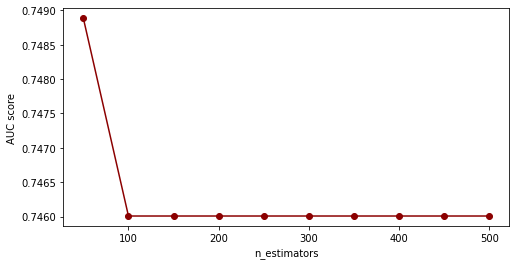

In [42]:
results_auc2 = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for trees in n_estimators:
    model_acc4 = AdaBoostClassifier(n_estimators = trees, random_state = 101)
    model_acc4.fit(x_train, y_train)
    y_pred = model_acc4.predict(x_test)
    #AUC function  
    auc2 = roc_auc_score(y_test, y_pred)
    results_auc2.append(auc2)
plt.figure(figsize = (8, 4))
pd.Series(results_auc2, n_estimators).plot(color = 'darkred', marker = 'o')
plt.ylabel('AUC score')
plt.xlabel('n_estimators')

Gradient Boost accuraacy model

Text(0.5, 0, 'n_estimators')

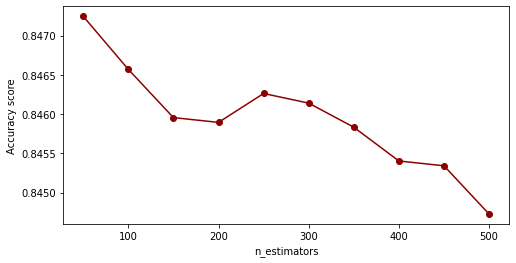

In [43]:
results_acc3 = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for trees in n_estimators:
    model_acc5 = GradientBoostingClassifier(n_estimators = trees, random_state = 101)
    model_acc5.fit(x_train, y_train)
    y_pred = model_acc5.predict(x_test)
    #Accuracy function  
    accuracy3 = np.mean(y_test == y_pred)
    results_acc3.append(accuracy3)
plt.figure(figsize = (8, 4))
pd.Series(results_acc3, n_estimators).plot(color = 'darkred', marker = 'o')
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')

Gradient Boost AUC model

Text(0.5, 0, 'n_estimators')

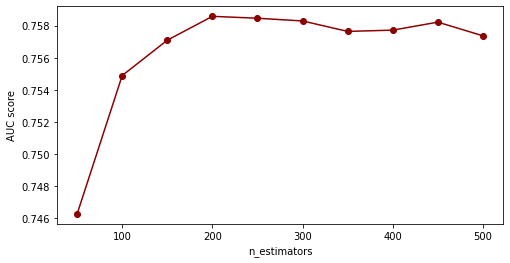

In [44]:
results_auc3 = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for trees in n_estimators:
    model_acc6 = GradientBoostingClassifier(n_estimators = trees, random_state = 101)
    model_acc6.fit(x_train, y_train)
    y_pred = model_acc6.predict(x_test)
    #AUC function  
    auc3 = roc_auc_score(y_test, y_pred)
    results_auc3.append(auc3)
plt.figure(figsize = (8, 4))
pd.Series(results_auc3, n_estimators).plot(color = 'darkred', marker = 'o')
plt.ylabel('AUC score')
plt.xlabel('n_estimators')

XGB accuraacy model

Text(0.5, 0, 'n_estimators')

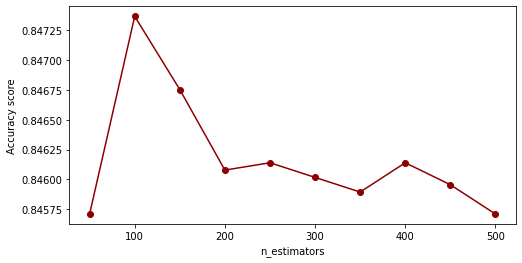

In [45]:
results_acc4 = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for trees in n_estimators:
    model_acc7 = XGBClassifier(n_estimators = trees, random_state = 101)
    model_acc7.fit(x_train, y_train)
    y_pred = model_acc7.predict(x_test)
    #Accuracy function  
    accuracy4 = np.mean(y_test == y_pred)
    results_acc4.append(accuracy4)
plt.figure(figsize = (8, 4))
pd.Series(results_acc4, n_estimators).plot(color = 'darkred', marker = 'o')
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')

XGB AUC model

Text(0.5, 0, 'n_estimators')

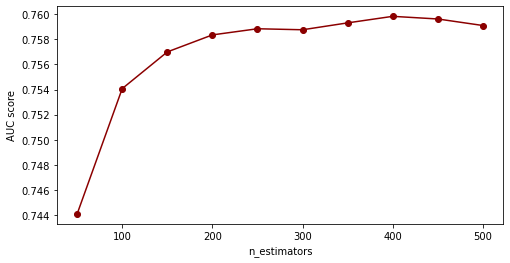

In [46]:
results_auc4 = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for trees in n_estimators:
    model_acc8 = XGBClassifier(n_estimators = trees, random_state = 101)
    model_acc8.fit(x_train, y_train)
    y_pred = model_acc8.predict(x_test)
    #AUC function  
    auc4 = roc_auc_score(y_test, y_pred)
    results_auc4.append(auc4)
plt.figure(figsize = (8, 4))
pd.Series(results_auc4, n_estimators).plot(color = 'darkred', marker = 'o')
plt.ylabel('AUC score')
plt.xlabel('n_estimators')

# **5. Compare Performance**

In [47]:
Table = pd.DataFrame({"Random Forest": [accuracy1,auc1],
                     "Ada Boost": [accuracy2,auc2],
                     "Gradient Boost": [accuracy3,auc3],
                     "XGB": [accuracy4,auc4]}, 
                     index = ["Accuracy","AUC"])
print(Table)

          Random Forest  Ada Boost  Gradient Boost       XGB
Accuracy       0.839260   0.844788        0.844727  0.845710
AUC            0.747417   0.746008        0.757372  0.759092


The best values for andom Forest,AdaBoost, Gradient Boost, and XGB are provide in above table.

# **Answer the following questions for Random Forest model and each algorithm in 4:**

**1. Write your observations about the Classifier’s behavior with respect to the number
of estimators**

*By using the Random Forest, daBoost, Gradient Boost, and XGB classifiers with a specific given range of n_estimator ranging from 50 to 500, we are able to clearly find the accuracy and AUC scores for comparison. Throughout the 4 models we used for testing, we may graph the change of accuracy scores and AUC scores at each specific n_estimator value. And finally we may find the best accuracy scores and AUC scores through out the graph and record them into the dictionary table we created.*

**2. Is there an optimal value of the estimator within the given range?**

*Within the given range n_estimator from 50 to 500, we succefully found the optimal values based and accuracy scores and AUC scores for XGB models except for the Ada Boost models and part of the Random Forest model and Gradient Boost model. Based on the graph, we can tell the Random Forest model has the highest value at the n_estimator at 50, yes, we found an optimal value, but we cannot predict if there is another climate that can be higher than we we have from the graph out of this range from 50 to 500. Same reason for both the accuracy and AUC graph for Ada Forest models, as well as the accuracy for the Gradient Boost model, we higest point of their graphs are all at 50 n_estimator, we cannot be sure if there is a higher value when n_estimator is less than 50.*